# Data Analyst Case Study
## CO_2 and Greenhouse Gas Emissions
Die Aufgabe:
 
Exploration und selbstbestimmte Analyse der Daten mit der frei verfügbaren Software KNIME Analytics Platform. 
 
Fokus soll auf der Emissionen Deutschlands über einen selbst gewählten Zeitraum mit eigenständig gewähltem Analyseschwerpunkt liegen. Eine Kombination mit anderen frei verfügbaren Datenquellen (z.B. Wetter- oder Wirtschaftsdaten) kann, muss aber nicht erfolgen. 
 
Bitte bereiten Sie sich darauf vor, Ihre Ergebnisse und Ihre Herangehensweise im gemeinsamen Gespräch vorzustellen und zu diskutieren.
 
Die Case Study soll als Grundlage für ein fachliches Gespräch und einen Einblick in Ihre Herangehens- und Präsentationsweise dienen. Insbesondere die Data Preparation muss hierbei nicht zu viel Aufwand bedeuten.

https://github.com/owid/co2-data

### Vorgehensweise:
- Überblick verschaffen
- Scatterplots
- Zeitraum beschränken
- Fokus auf Energieproduktion und Zement
- historeische Ereignisse?
    - Widervereinigung, 2008, Ukraine


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [351]:
owid_co2_df = pd.read_csv(r"https://raw.githubusercontent.com/owid/co2-data/refs/heads/master/owid-co2-data.csv")
co2_codebook_df = pd.read_csv(r"https://raw.githubusercontent.com/owid/co2-data/refs/heads/master/owid-co2-codebook.csv")

owid_energy_df = pd.read_csv(r"https://raw.githubusercontent.com/owid/energy-data/refs/heads/master/owid-energy-data.csv")
energy_codebook_df = pd.read_csv(r"https://raw.githubusercontent.com/owid/energy-data/refs/heads/master/owid-energy-codebook.csv")

In [353]:
co2_codebook_df.head()

,column,description,unit,source
0,country,Country - Geographic location.,NaN,Our World in Data - Regions (2023)
1,year,Year - Year of observation.,NaN,Our World in Data - Regions (2023)
2,iso_code,ISO code - ISO 3166-1 alpha-3 three-letter cou...,NaN,International Organization for Standardization...
3,population,"Population - Population by country, available ...",people,Population based on various sources (2024) [ht...
4,gdp,Gross domestic product (GDP) - This data is ad...,international-$ in 2011 prices,Bolt and van Zanden - Maddison Project Databas...


In [ ]:
# Filter data from germany

germany_co2_df = owid_co2_df.loc[owid_co2_df.country == "Germany"]

germany_energy_df = owid_energy_df.loc[owid_energy_df.country == "Germany"]

In [355]:
germany_co2_df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
17999,Germany,1792,DEU,NaN,NaN,NaN,NaN,0.469,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18000,Germany,1793,DEU,NaN,NaN,NaN,NaN,0.480,0.011,2.344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18001,Germany,1794,DEU,NaN,NaN,NaN,NaN,0.443,-0.037,-7.634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18002,Germany,1795,DEU,NaN,NaN,NaN,NaN,0.447,0.004,0.826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18003,Germany,1796,DEU,NaN,NaN,NaN,NaN,0.535,0.088,19.672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [356]:
germany_energy_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
7835,Germany,1900,DEU,55775391.0,2.587781e+11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7836,Germany,1901,DEU,56591445.0,2.526593e+11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7837,Germany,1902,DEU,57433002.0,2.586955e+11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7838,Germany,1903,DEU,58300637.0,2.731376e+11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7839,Germany,1904,DEU,59181365.0,2.840587e+11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [446]:
def create_line_plot(col: str, y_label: str, ds = "co2", x_label = "Year", unit_label=True, descritpion = False):
    """
    Create a line plot and fetch units and title from codebook if desired.
  
    :param col: asdf
    :param y_label: asdf

    :return: None

    """
    data_sources = {"co2": germany_co2_df, "energy": germany_energy_df}
    codebook = {"co2": co2_codebook_df, "energy": energy_codebook_df}
    assert ds in data_sources, "Data Source must be co2 or energy"
    plt.plot(data_sources[ds]["year"], data_sources[ds][col])

    if unit_label:
        try:
            unit = " (" +  codebook[ds].loc[codebook[ds]["column"] == col]["unit"].values[0] + ")"
        except:
            unit = ""
    else:
        unit = ""
    
    if descritpion:
        try:
            descritpion_text = codebook[ds].loc[codebook[ds]["column"] == col]["description"].values[0]
        except:
            descritpion_text = ""
        plt.figtext(0.5, -0.02, descritpion_text, ha="center")

    plt.xlabel(x_label)
    plt.ylabel(f"{y_label} {unit}")



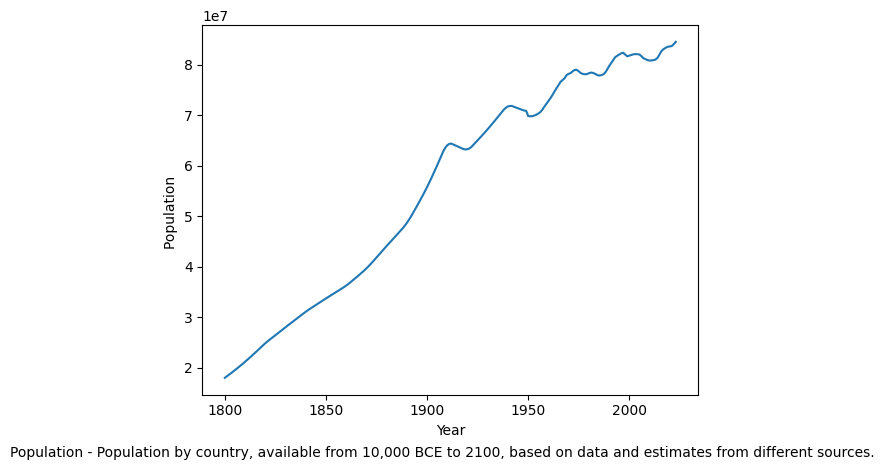

In [451]:
create_line_plot("population", "Population", unit_label=False, descritpion=True)
plt.show()

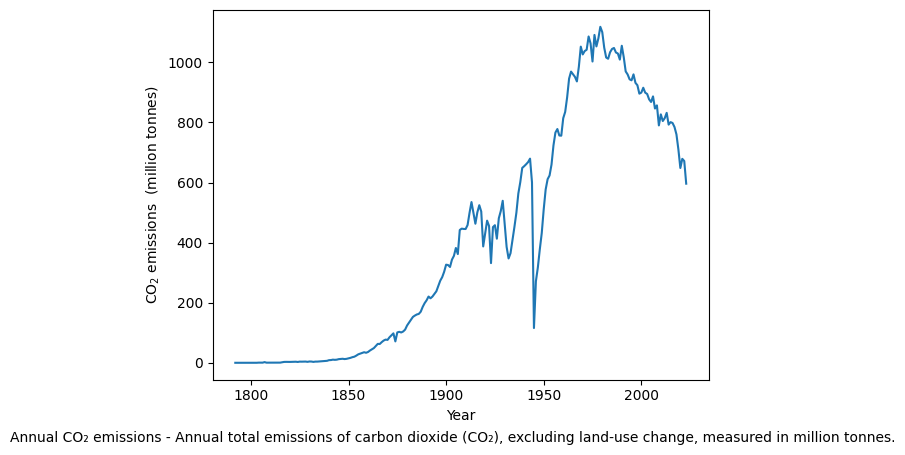

In [453]:
create_line_plot("co2", "CO$_2$ emissions", unit_label=True, descritpion=True)

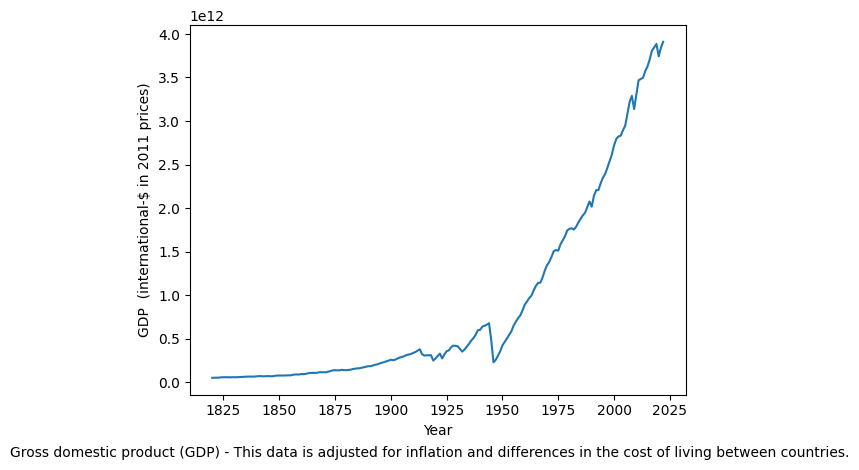

In [456]:
create_line_plot("gdp", "GDP", descritpion=True)

Wann waren die jährlichen CO2-Emissionen am hächsten?

In [458]:
germany_co2_df[germany_co2_df["co2"] == germany_co2_df["co2"].max()]["year"].values[0]

np.int64(1979)

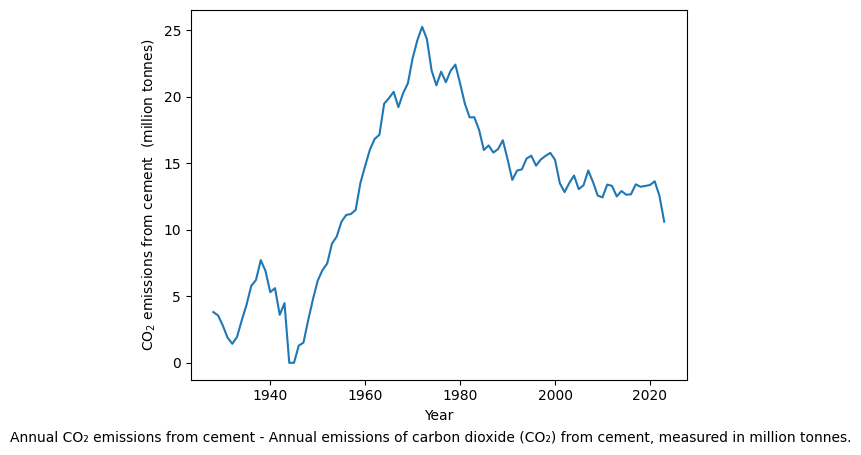

In [460]:
create_line_plot("cement_co2", "CO$_2$ emissions from cement", descritpion=True)

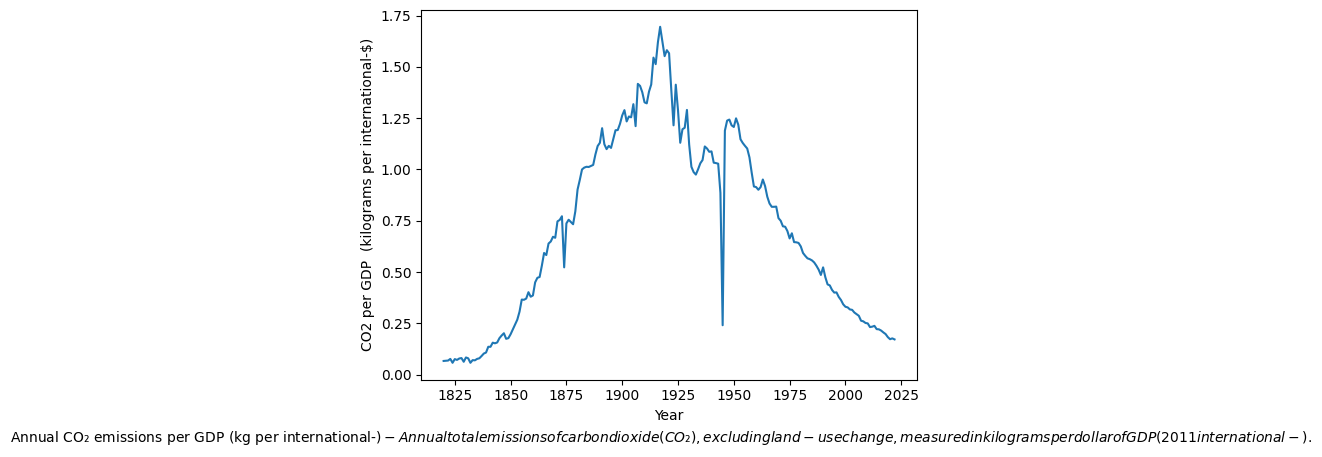

In [463]:
create_line_plot("co2_per_gdp", "CO2 per GDP",descritpion=True)

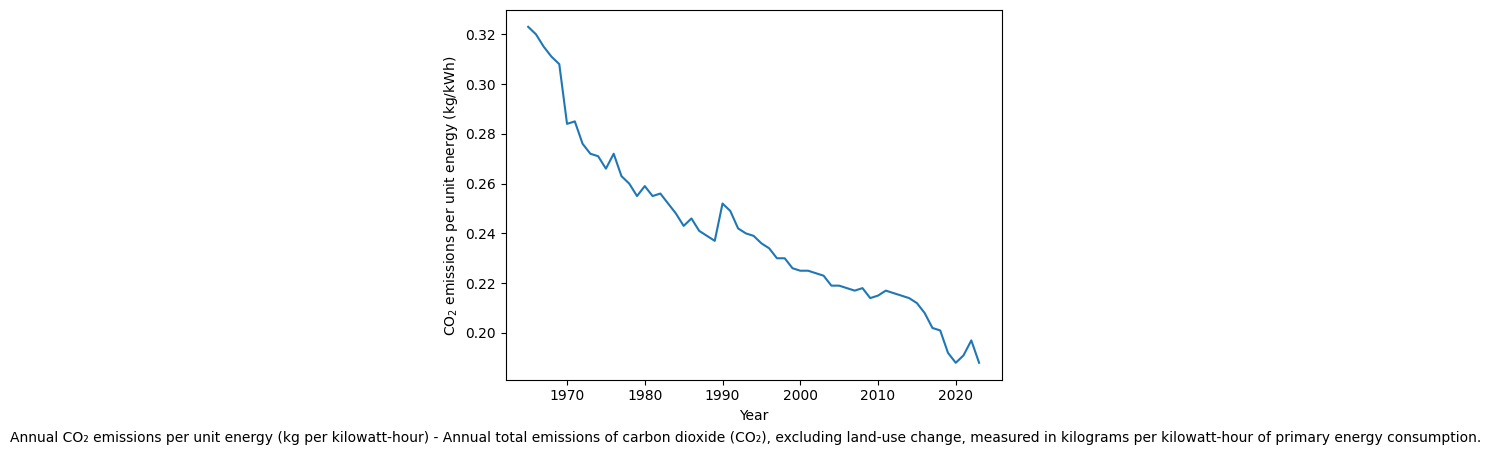

In [467]:
create_line_plot("co2_per_unit_energy", "CO$_2$ emissions per unit energy (kg/kWh)", descritpion=True, unit_label=False)

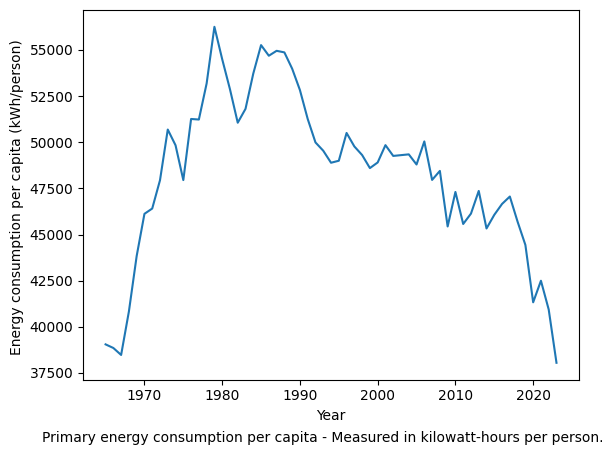

In [470]:
create_line_plot("energy_per_capita", "Energy consumption per capita (kWh/person)", descritpion=True, unit_label=False)

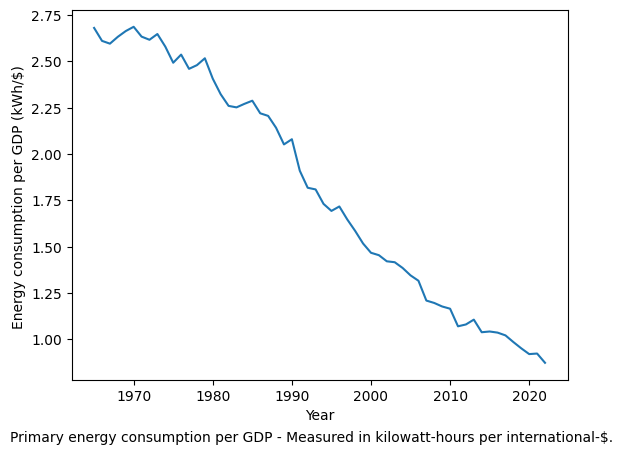

In [473]:
create_line_plot("energy_per_gdp", "Energy consumption per GDP (kWh/$)", descritpion=True, unit_label=False)

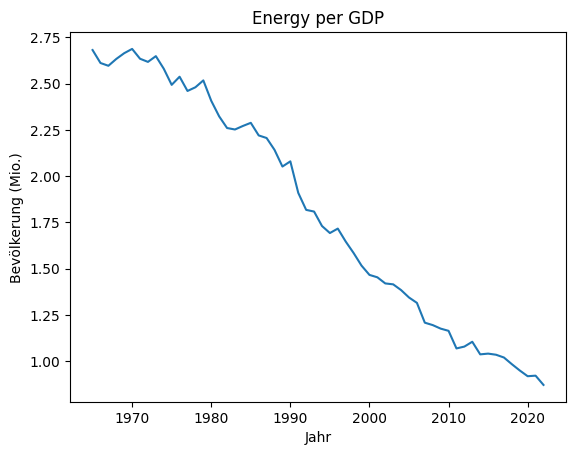

In [385]:
plt.plot(germany_co2_df.year, germany_co2_df.energy_per_gdp)
plt.xlabel("Jahr")
plt.ylabel("Bevölkerung (Mio.)")
plt.title("Energy per GDP")
plt.show()

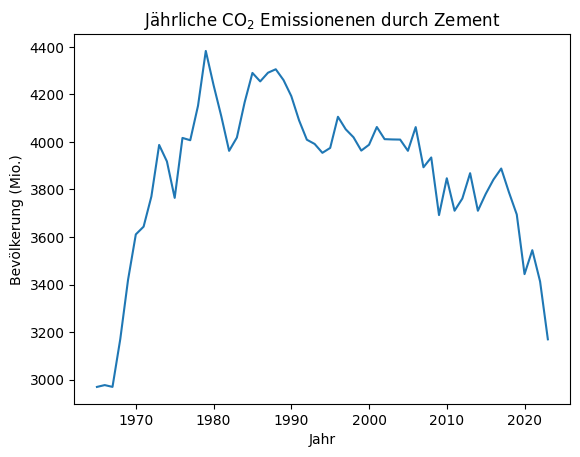

In [374]:
plt.plot(germany_co2_df.year, germany_co2_df.primary_energy_consumption)
plt.xlabel("Jahr")
plt.ylabel("Bevölkerung (Mio.)")
plt.title("Jährliche CO$_2$ Emissionenen durch Zement")
plt.show()

In [368]:
cement_related = [col for col in germany_co2_df.columns if "cement" in col]
for col in cement_related:
    print(col)

cement_co2
cement_co2_per_capita
cumulative_cement_co2
share_global_cement_co2
share_global_cumulative_cement_co2


In [369]:
energy_consumption_by_source = [col for col in energy_codebook_df.columns if "consumption" in col]

energy_consumption_totals = ["fossil_fuel_consumption","primary_energy_consumption", "renewables_consumption"]

energy_consumption_by_source = [source for source in energy_consumption_by_source if source not in energy_consumption_totals]

In [370]:
for col in energy_consumption_by_source:
    print(col)

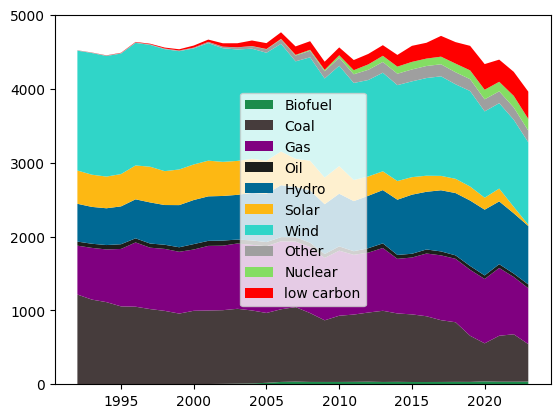

In [371]:
colorsheme = {"Biofuel": "#1c8c4c",
              "Coal": "#463c3c",
              "Gas": "purple",
              "Oil": "#1C1E1B",
              "Hydro": "#006994",
              "Solar": "#FDB813",
              "Wind": "#30D5C8",
              "Other": "#9f9f9f",
              "Nuclear": "#84dd63",
              "low carbon": "red"}

plt.stackplot(germany_energy_df["year"],
              germany_energy_df["biofuel_consumption"],
              germany_energy_df["coal_consumption"],
              germany_energy_df["gas_consumption"],
              germany_energy_df["hydro_consumption"],
              germany_energy_df["low_carbon_consumption"],
              germany_energy_df["nuclear_consumption"],
              germany_energy_df["oil_consumption"],
              germany_energy_df["other_renewable_consumption"],
              germany_energy_df["solar_consumption"],
              germany_energy_df["wind_consumption"],
              colors=colorsheme.values(),
              labels=colorsheme.keys())
plt.legend()
plt.show()

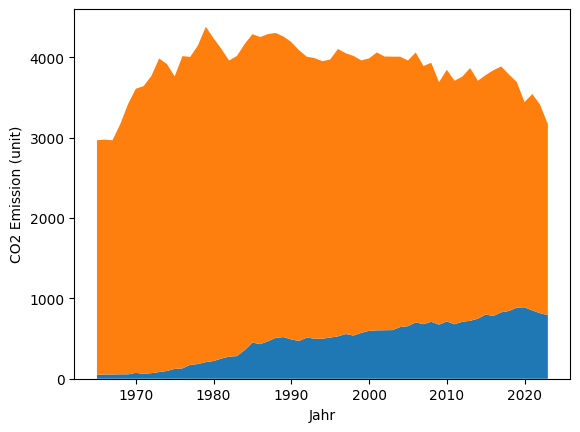

In [372]:
plt.stackplot(germany_energy_df["year"],
              #germany_energy_df["renewables_consumption"],
              germany_energy_df["low_carbon_consumption"],
              germany_energy_df["fossil_fuel_consumption"]
              )
# plt.plot(germany_energy_df["year"],
#          germany_energy_df["primary_energy_consumption"], c="black", label="Primary Energy Consumption")
plt.xlabel("Jahr")
plt.ylabel(f"CO2 Emission (unit)")
plt.show()

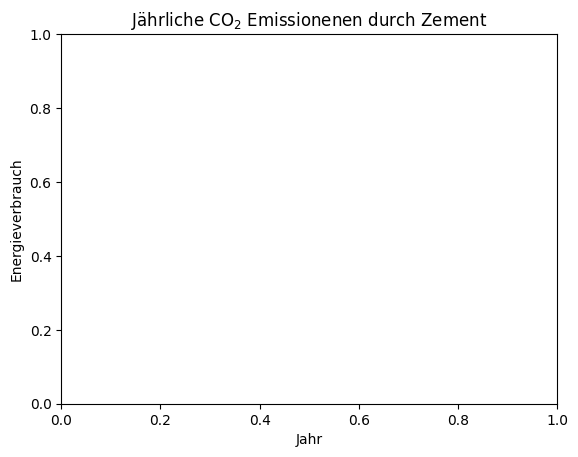

In [450]:
for entry in energy_consumption_by_source:
    plt.plot(germany_energy_df["year"], germany_energy_df[entry], label=entry)
plt.xlabel("Jahr")
plt.ylabel("Energieverbrauch")
plt.title("Jährliche CO$_2$ Emissionenen durch Zement")
plt.show()